In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold 
from sklearn.metrics import mean_squared_error

In [3]:
pd.set_option('display.max_columns', None)
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors='coerce')
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [6]:
churn.isnull().sum().sort_values(ascending = False)/len(churn)*100

TotalCharges        0.156183
Churn               0.000000
OnlineSecurity      0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
customerID          0.000000
dtype: float64

In [7]:
churn['TotalCharges'].fillna(value = churn['TotalCharges'].median(), inplace=True)
churn['TotalCharges'].isnull().sum()

0

In [8]:
converttoBinary={
    'Yes' : 1,
    'No' : 0,
    'No internet service' : 0,
    'No phone service' : 0
}

replaceFeatureVal = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn', 'OnlineSecurity', 
                    'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in replaceFeatureVal:
    churn[i] = churn[i].map(converttoBinary)

In [9]:
churn['MultipleLines'] = np.where(churn.MultipleLines == 'Yes', 1, 0)
churn['InternetDSL'] = np.where(churn.InternetService == 'DSL', 1, 0)
churn['InternetFiber'] = np.where(churn.InternetService == 'Fiber optic', 1, 0)
churn['Female'] = np.where(churn.gender == 'Female', 1, 0)
churn['OneYrContract'] = np.where(churn.Contract == 'One year', 1, 0)
churn['TwoYrContract'] = np.where(churn.Contract == 'Two year', 1, 0)

In [10]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetDSL,InternetFiber,Female,OneYrContract,TwoYrContract
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,1,0,0


In [11]:
x = churn.drop(['customerID','gender','InternetService','Contract','PaymentMethod','Churn'], axis = 1)
y = churn['Churn']

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int32
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
InternetDSL         7043 non-null int32
InternetFiber       7043 non-null int32
Female              7043 non-null int32
OneYrContract       7043 non-null int32
TwoYrContract       7043 non-null int32
dtypes: float64(2), int32(6), int64(12)
memory usage: 935.5 KB


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

In [14]:
from keras.utils import to_categorical
y = np.array(y)
y = to_categorical(y)
y.shape

Using TensorFlow backend.


(7043, 2)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [23]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/5
70/70 [==============================] - 0s 28us/step - loss: 0.5904 - acc: 0.6714
Epoch 2/5
70/70 [==============================] - 0s 14us/step - loss: 0.5896 - acc: 0.6714
Epoch 3/5
70/70 [==============================] - 0s 28us/step - loss: 0.5889 - acc: 0.6714
Epoch 4/5
70/70 [==============================] - 0s 28us/step - loss: 0.5882 - acc: 0.6714
Epoch 5/5
6973/6973 [==============================] - 0s 23us/step
Epoch 1/5
704/704 [==============================] - 0s 20us/step - loss: 0.5403 - acc: 0.7386
Epoch 2/5
704/704 [==============================] - 0s 21us/step - loss: 0.5401 - acc: 0.7386
Epoch 3/5
704/704 [==============================] - 0s 27us/step - loss: 0.5398 - acc: 0.7386
Epoch 4/5
704/704 [==============================] - 0s 23us/step - loss: 0.5398 - acc: 0.7386
Epoch 5/5
6339/6339 [==============================] - 0s 11us/step
Epoch 1/5
1408/1408 [==============================] - 0s 19us/step - loss: 0.5336 - acc: 0.7450
Epoch 2/5
1408/

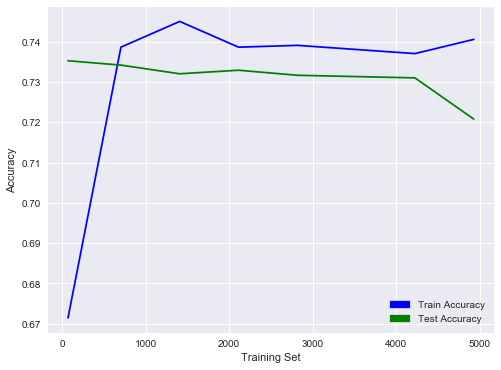

In [24]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with sigmoid activation function is {0:.2f}%".format(accuracy))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [18]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/5
70/70 [==============================] - 0s 14us/step - loss: 0.6123 - acc: 0.6714
Epoch 2/5
70/70 [==============================] - 0s 29us/step - loss: 0.6116 - acc: 0.6714
Epoch 3/5
70/70 [==============================] - 0s 28us/step - loss: 0.6109 - acc: 0.6714
Epoch 4/5
70/70 [==============================] - 0s 28us/step - loss: 0.6102 - acc: 0.6714
Epoch 5/5
6973/6973 [==============================] - 0s 9us/step
Epoch 1/5
704/704 [==============================] - 0s 17us/step - loss: 0.5555 - acc: 0.7386
Epoch 2/5
704/704 [==============================] - 0s 16us/step - loss: 0.5551 - acc: 0.7386
Epoch 3/5
704/704 [==============================] - 0s 23us/step - loss: 0.5549 - acc: 0.7386
Epoch 4/5
704/704 [==============================] - 0s 24us/step - loss: 0.5548 - acc: 0.7386
Epoch 5/5
6339/6339 [==============================] - 0s 9us/step
Epoch 1/5
1408/1408 [==============================] - 0s 18us/step - loss: 0.5479 - acc: 0.7450
Epoch 2/5
1408/14

NameError: name 'mpatches' is not defined

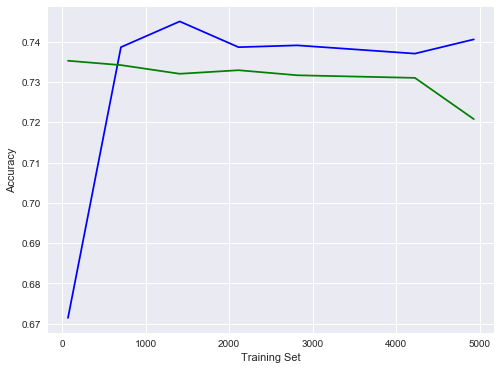

In [19]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [225]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with Tanh activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
5070/5070 [==============================] - 0s 19us/step - loss: 5.8997 - acc: 0.5198
Epoch 2/2
1268/1268 [==============================] - 0s 10us/step
Epoch 1/2
5070/5070 [==============================] - 0s 18us/step - loss: 5.8572 - acc: 0.5214
Epoch 2/2
1268/1268 [==============================] - 0s 13us/step
Epoch 1/2
5070/5070 [==============================] - 0s 19us/step - loss: 5.7609 - acc: 0.5235
Epoch 2/2
1268/1268 [==============================] - 0s 15us/step
Epoch 1/2
5071/5071 [==============================] - 0s 21us/step - loss: 2.0412 - acc: 0.4492
Epoch 2/2
1267/1267 [==============================] - 0s 14us/step
Epoch 1/2
5071/5071 [==============================] - 0s 19us/step - loss: 1.6324 - acc: 0.4789
Epoch 2/2
1267/1267 [==============================] - 0s 14us/step
The accuracy of the neural net with Tanh activation function is 49.18%


In [226]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='relu'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [227]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/5
70/70 [==============================] - 0s 4ms/step - loss: 5.5786 - acc: 0.5000
Epoch 2/5
70/70 [==============================] - 0s 43us/step - loss: 3.3019 - acc: 0.5786
Epoch 3/5
70/70 [==============================] - 0s 28us/step - loss: 2.9782 - acc: 0.6071
Epoch 4/5
70/70 [==============================] - 0s 29us/step - loss: 2.9433 - acc: 0.6071
Epoch 5/5
6973/6973 [==============================] - 0s 12us/step
Epoch 1/5
704/704 [==============================] - 0s 18us/step - loss: 2.4277 - acc: 0.6584
Epoch 2/5
704/704 [==============================] - 0s 30us/step - loss: 2.4161 - acc: 0.6705
Epoch 3/5
704/704 [==============================] - 0s 27us/step - loss: 2.4046 - acc: 0.6804
Epoch 4/5
704/704 [==============================] - 0s 27us/step - loss: 2.4143 - acc: 0.6818
Epoch 5/5
6339/6339 [==============================] - 0s 17us/step
Epoch 1/5
1408/1408 [==============================] - 0s 22us/step - loss: 2.3173 - acc: 0.7184
Epoch 2/5
1408/1

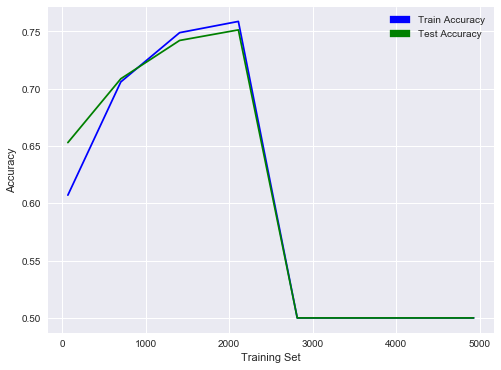

In [228]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [229]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with Relu activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
5070/5070 [==============================] - 0s 19us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
1268/1268 [==============================] - 0s 10us/step
Epoch 1/2
5070/5070 [==============================] - 0s 18us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
1268/1268 [==============================] - 0s 16us/step
Epoch 1/2
5070/5070 [==============================] - 0s 17us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
1268/1268 [==============================] - 0s 10us/step
Epoch 1/2
5071/5071 [==============================] - 0s 18us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
1267/1267 [==============================] - 0s 15us/step
Epoch 1/2
5071/5071 [==============================] - 0s 18us/step - loss: 7.7125 - acc: 0.5000
Epoch 2/2
1267/1267 [==============================] - 0s 15us/step
The accuracy of the neural net with Relu activation function is 50.00%


In [242]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
nodes_list=[8,16,32,64,128,256]
train_acc = []
test_acc = []
model = Sequential()
for i in nodes_list:
    model.add(Dense(i, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
    model.fit(x_train,y_train,epochs=5)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
4930/4930 [==============================] - 1s 143us/step - loss: 0.6675 - acc: 0.6193
Epoch 2/5
4930/4930 [==============================] - 0s 71us/step - loss: 0.5929 - acc: 0.7416
Epoch 3/5
4930/4930 [==============================] - 0s 66us/step - loss: 0.5678 - acc: 0.7406
Epoch 4/5
4930/4930 [==============================] - 0s 64us/step - loss: 0.5583 - acc: 0.7406
Epoch 5/5
2113/2113 [==============================] - 0s 63us/step
Epoch 1/5
4930/4930 [==============================] - 1s 167us/step - loss: 0.6239 - acc: 0.6652
Epoch 2/5
4930/4930 [==============================] - 0s 69us/step - loss: 0.5809 - acc: 0.7406
Epoch 3/5
4930/4930 [==============================] - 0s 70us/step - loss: 0.5739 - acc: 0.7406
Epoch 4/5
4930/4930 [==============================] - 0s 76us/step - loss: 0.5726 - acc: 0.7406
Epoch 5/5
2113/2113 [==============================] - 0s 54us/step
Epoch 1/5
4930/4930 [==============================] - 1s 185us/step - loss: 0.6060 - 

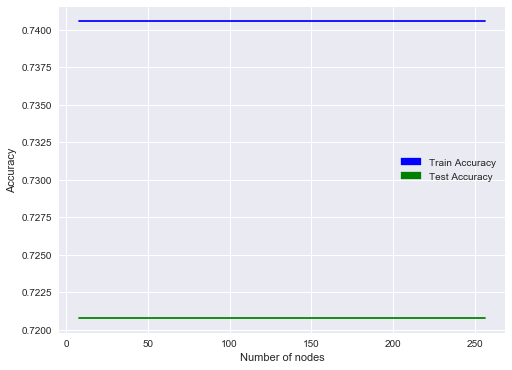

In [244]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(nodes_list, train_acc, color = "blue") 
plt.plot(nodes_list, test_acc, color = "green") 
plt.xlabel("Number of nodes") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [245]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
layers_list=[1,2,3,4,5]
train_acc = []
test_acc = []
for i in layers_list:
    model = Sequential()
    for l in range(i):
        model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
    model.fit(x_train,y_train,epochs=5)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
4930/4930 [==============================] - 1s 159us/step - loss: 0.6135 - acc: 0.6994
Epoch 2/5
4930/4930 [==============================] - 0s 75us/step - loss: 0.5718 - acc: 0.7406
Epoch 3/5
4930/4930 [==============================] - 0s 78us/step - loss: 0.5684 - acc: 0.7406
Epoch 4/5
4930/4930 [==============================] - 0s 79us/step - loss: 0.5645 - acc: 0.7406
Epoch 5/5
2113/2113 [==============================] - 0s 72us/step
Epoch 1/5
4930/4930 [==============================] - 1s 190us/step - loss: 0.5973 - acc: 0.7048
Epoch 2/5
4930/4930 [==============================] - 1s 110us/step - loss: 0.5713 - acc: 0.7406
Epoch 3/5
4930/4930 [==============================] - 1s 108us/step - loss: 0.5709 - acc: 0.7406
Epoch 4/5
4930/4930 [==============================] - 1s 110us/step - loss: 0.5702 - acc: 0.7406
Epoch 5/5
2113/2113 [==============================] - 0s 69us/step
Epoch 1/5
4930/4930 [==============================] - 1s 247us/step - loss: 0.5827

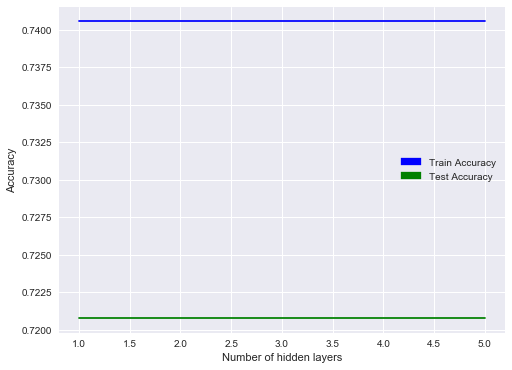

In [246]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(layers_list, train_acc, color = "blue") 
plt.plot(layers_list, test_acc, color = "green") 
plt.xlabel("Number of hidden layers") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
neighbours_list=[1,2,3,4,5,7,10,15]
train_acc = []
test_acc = []
for i in neighbours_list:
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(x_train,y_train)
    train_acc.append(knnmodel.score(x_train,y_train))
    test_acc.append(knnmodel.score(x_test,y_test))

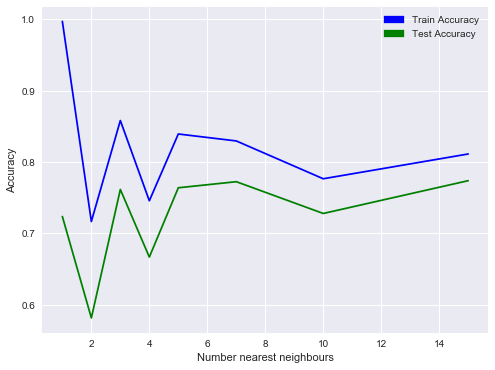

In [28]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(neighbours_list, train_acc, color = "blue") 
plt.plot(neighbours_list, test_acc, color = "green") 
plt.xlabel("Number nearest neighbours") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 